In [322]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [323]:
# year, black, pov, smoking state
use_all_race = False
use_black = False
use_all_pov = True
use_pov = True

savedir = '../../figs/menthol_ban/'
if not use_all_race:
    if use_black:
        savedir += 'black'
    else:
        savedir += 'not_black'
    
    if not use_all_pov:
        savedir += '_'
else:
    assert(not use_all_pov)

if not use_all_pov:
    if use_pov:
        savedir += 'pov'
    else:
        savedir += 'not_pov'

savedir += '/'
print(savedir)

../../figs/menthol_ban/not_black/


In [324]:
data_files = sorted(glob('../../outputs/numpy_arrays/*'))
data_files

['../../outputs/numpy_arrays/np_output_2022-02-26_10-31-08-506096.npy',
 '../../outputs/numpy_arrays/np_output_2022-03-29_15-33-27-166038.npy',
 '../../outputs/numpy_arrays/np_output_2022-03-29_15-33-37-113877.npy',
 '../../outputs/numpy_arrays/np_output_menthol_ban_2022-03-29_16-32-28-744841.npy',
 '../../outputs/numpy_arrays/np_output_menthol_ban_2022-03-29_21-26-16-555701.npy']

In [325]:
arr2 = np.load(data_files[-3])
arr = np.load(data_files[-1])

In [326]:
arr.shape

(51, 2, 2, 6)

In [327]:

arr_year_smoking_state = None
arr2_year_smoking_state = None

if use_all_race:
    arr_year_smoking_state = np.sum(arr, axis=1)
    arr2_year_smoking_state = np.sum(arr2, axis=1)
else:
    if use_black:
        arr_year_smoking_state = arr[:,1,:,:]
        arr2_year_smoking_state = arr2[:,1,:,:]
    else:
        arr_year_smoking_state = arr[:,0,:,:]
        arr2_year_smoking_state = arr2[:,0,:,:]

print(arr_year_smoking_state.shape)

if use_all_pov:
    arr_year_smoking_state = np.sum(arr_year_smoking_state, axis=1)
    arr2_year_smoking_state = np.sum(arr2_year_smoking_state, axis=1)
else:
    if use_pov:
        arr_year_smoking_state = arr_year_smoking_state[:,1,:]
        arr2_year_smoking_state = arr2_year_smoking_state[:,1,:]
    else:
        arr_year_smoking_state = arr_year_smoking_state[:,0,:]
        arr2_year_smoking_state = arr2_year_smoking_state[:,0,:]


arr_year_smoking_state.shape

(51, 2, 6)


(51, 6)

In [328]:
arr_year_smoking_state /= 1e6
arr2_year_smoking_state /= 1e6
max_pop = max(np.sum(arr_year_smoking_state, axis=1))
print(max_pop)

195.14534250444476


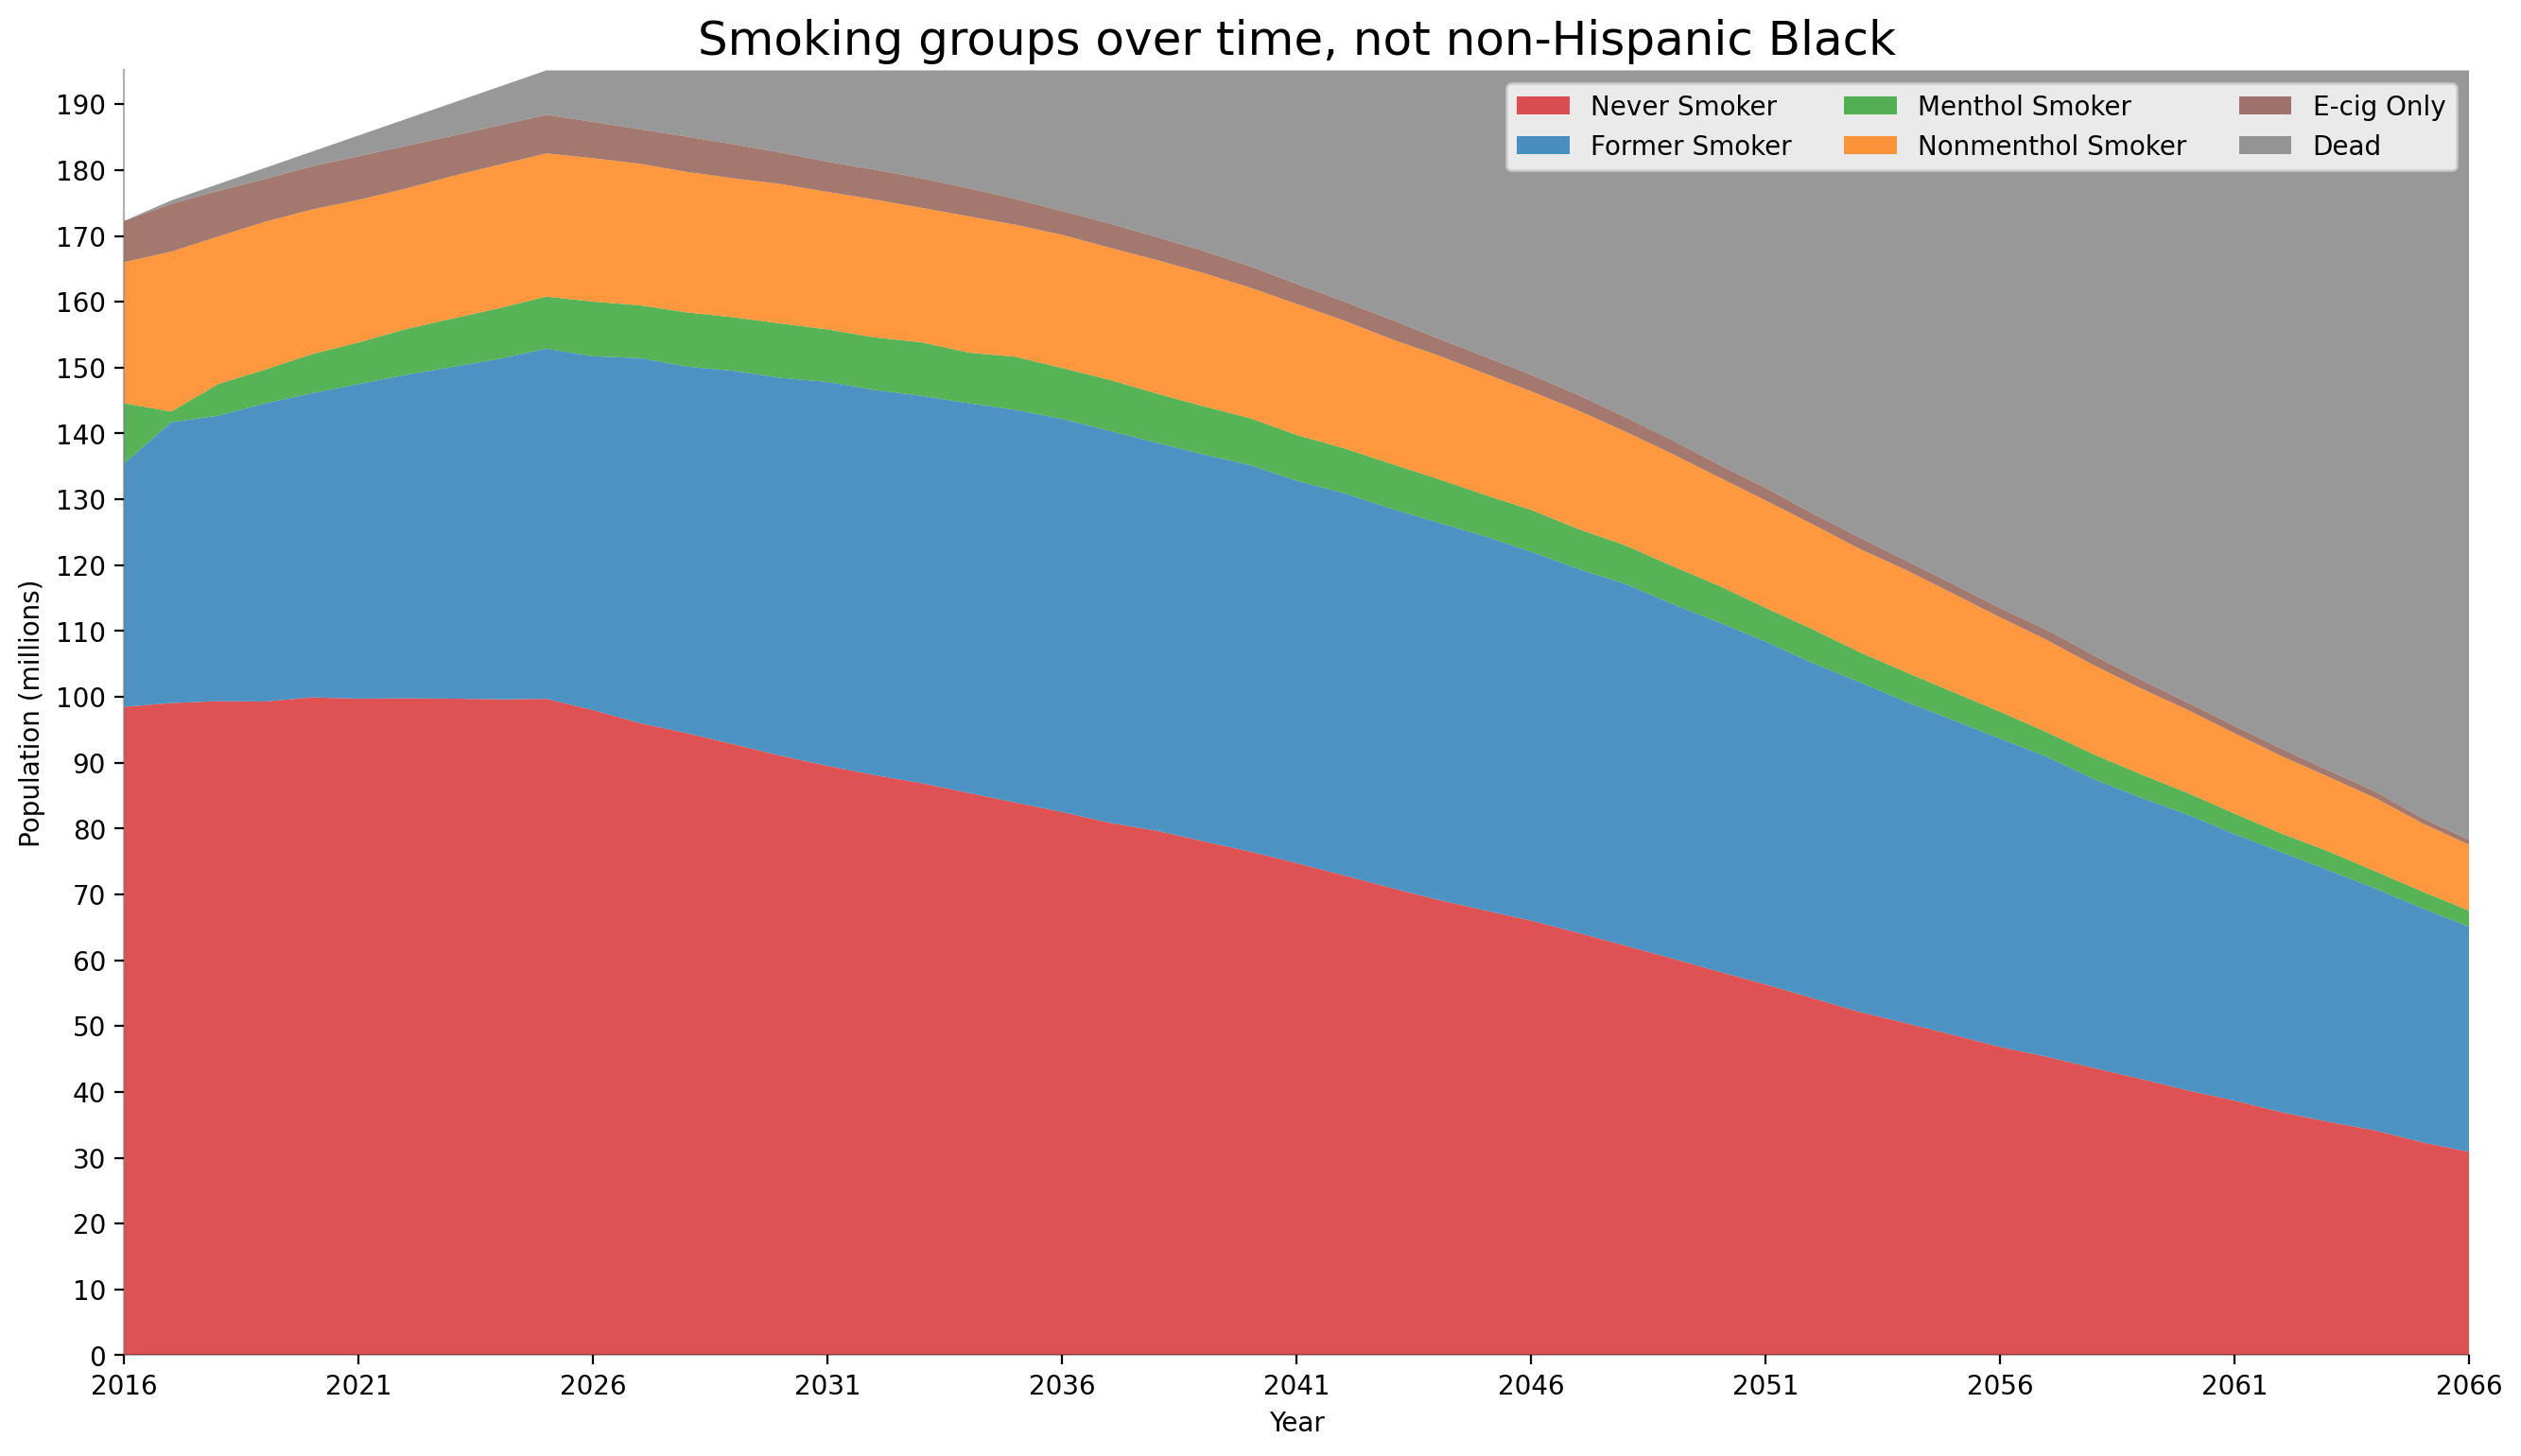

In [329]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(2016, 2016 + arr_year_smoking_state.shape[0])
y = np.vstack([arr_year_smoking_state[:,i] for i in range(arr_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

# for i in x:
#     ax.axvline(x=i, c="black")

title = 'Smoking groups over time'
if not use_all_race:
    if use_black:
        title += ', non-Hispanic Black'
    else:
        title += ', not non-Hispanic Black'
if not use_all_pov:
    if use_pov:
        title += ', below poverty line'
    else:
        title += ', at or above poverty line'
ax.set_title(title, fontsize=18)
ax.set(ylim=[0, max_pop])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,max_pop,10,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.savefig(savedir + "stack_plot.png")

In [330]:
arr_year_smoking_state.shape

(51, 6)

In [331]:
arr_no_dead = arr_year_smoking_state[:,:-1]
arr2_no_dead = arr2_year_smoking_state[:,:-1]
arr_no_dead.shape

(51, 5)

In [332]:
arr_no_dead_percents = arr_no_dead / np.sum(arr_no_dead, axis=1).reshape(-1,1) * 100
arr2_no_dead_percents = arr2_no_dead / np.sum(arr2_no_dead, axis=1).reshape(-1,1) * 100
arr_no_dead_percents[10,:]

array([52.30727676, 28.68720425,  4.43869541, 11.62783036,  2.93899323])

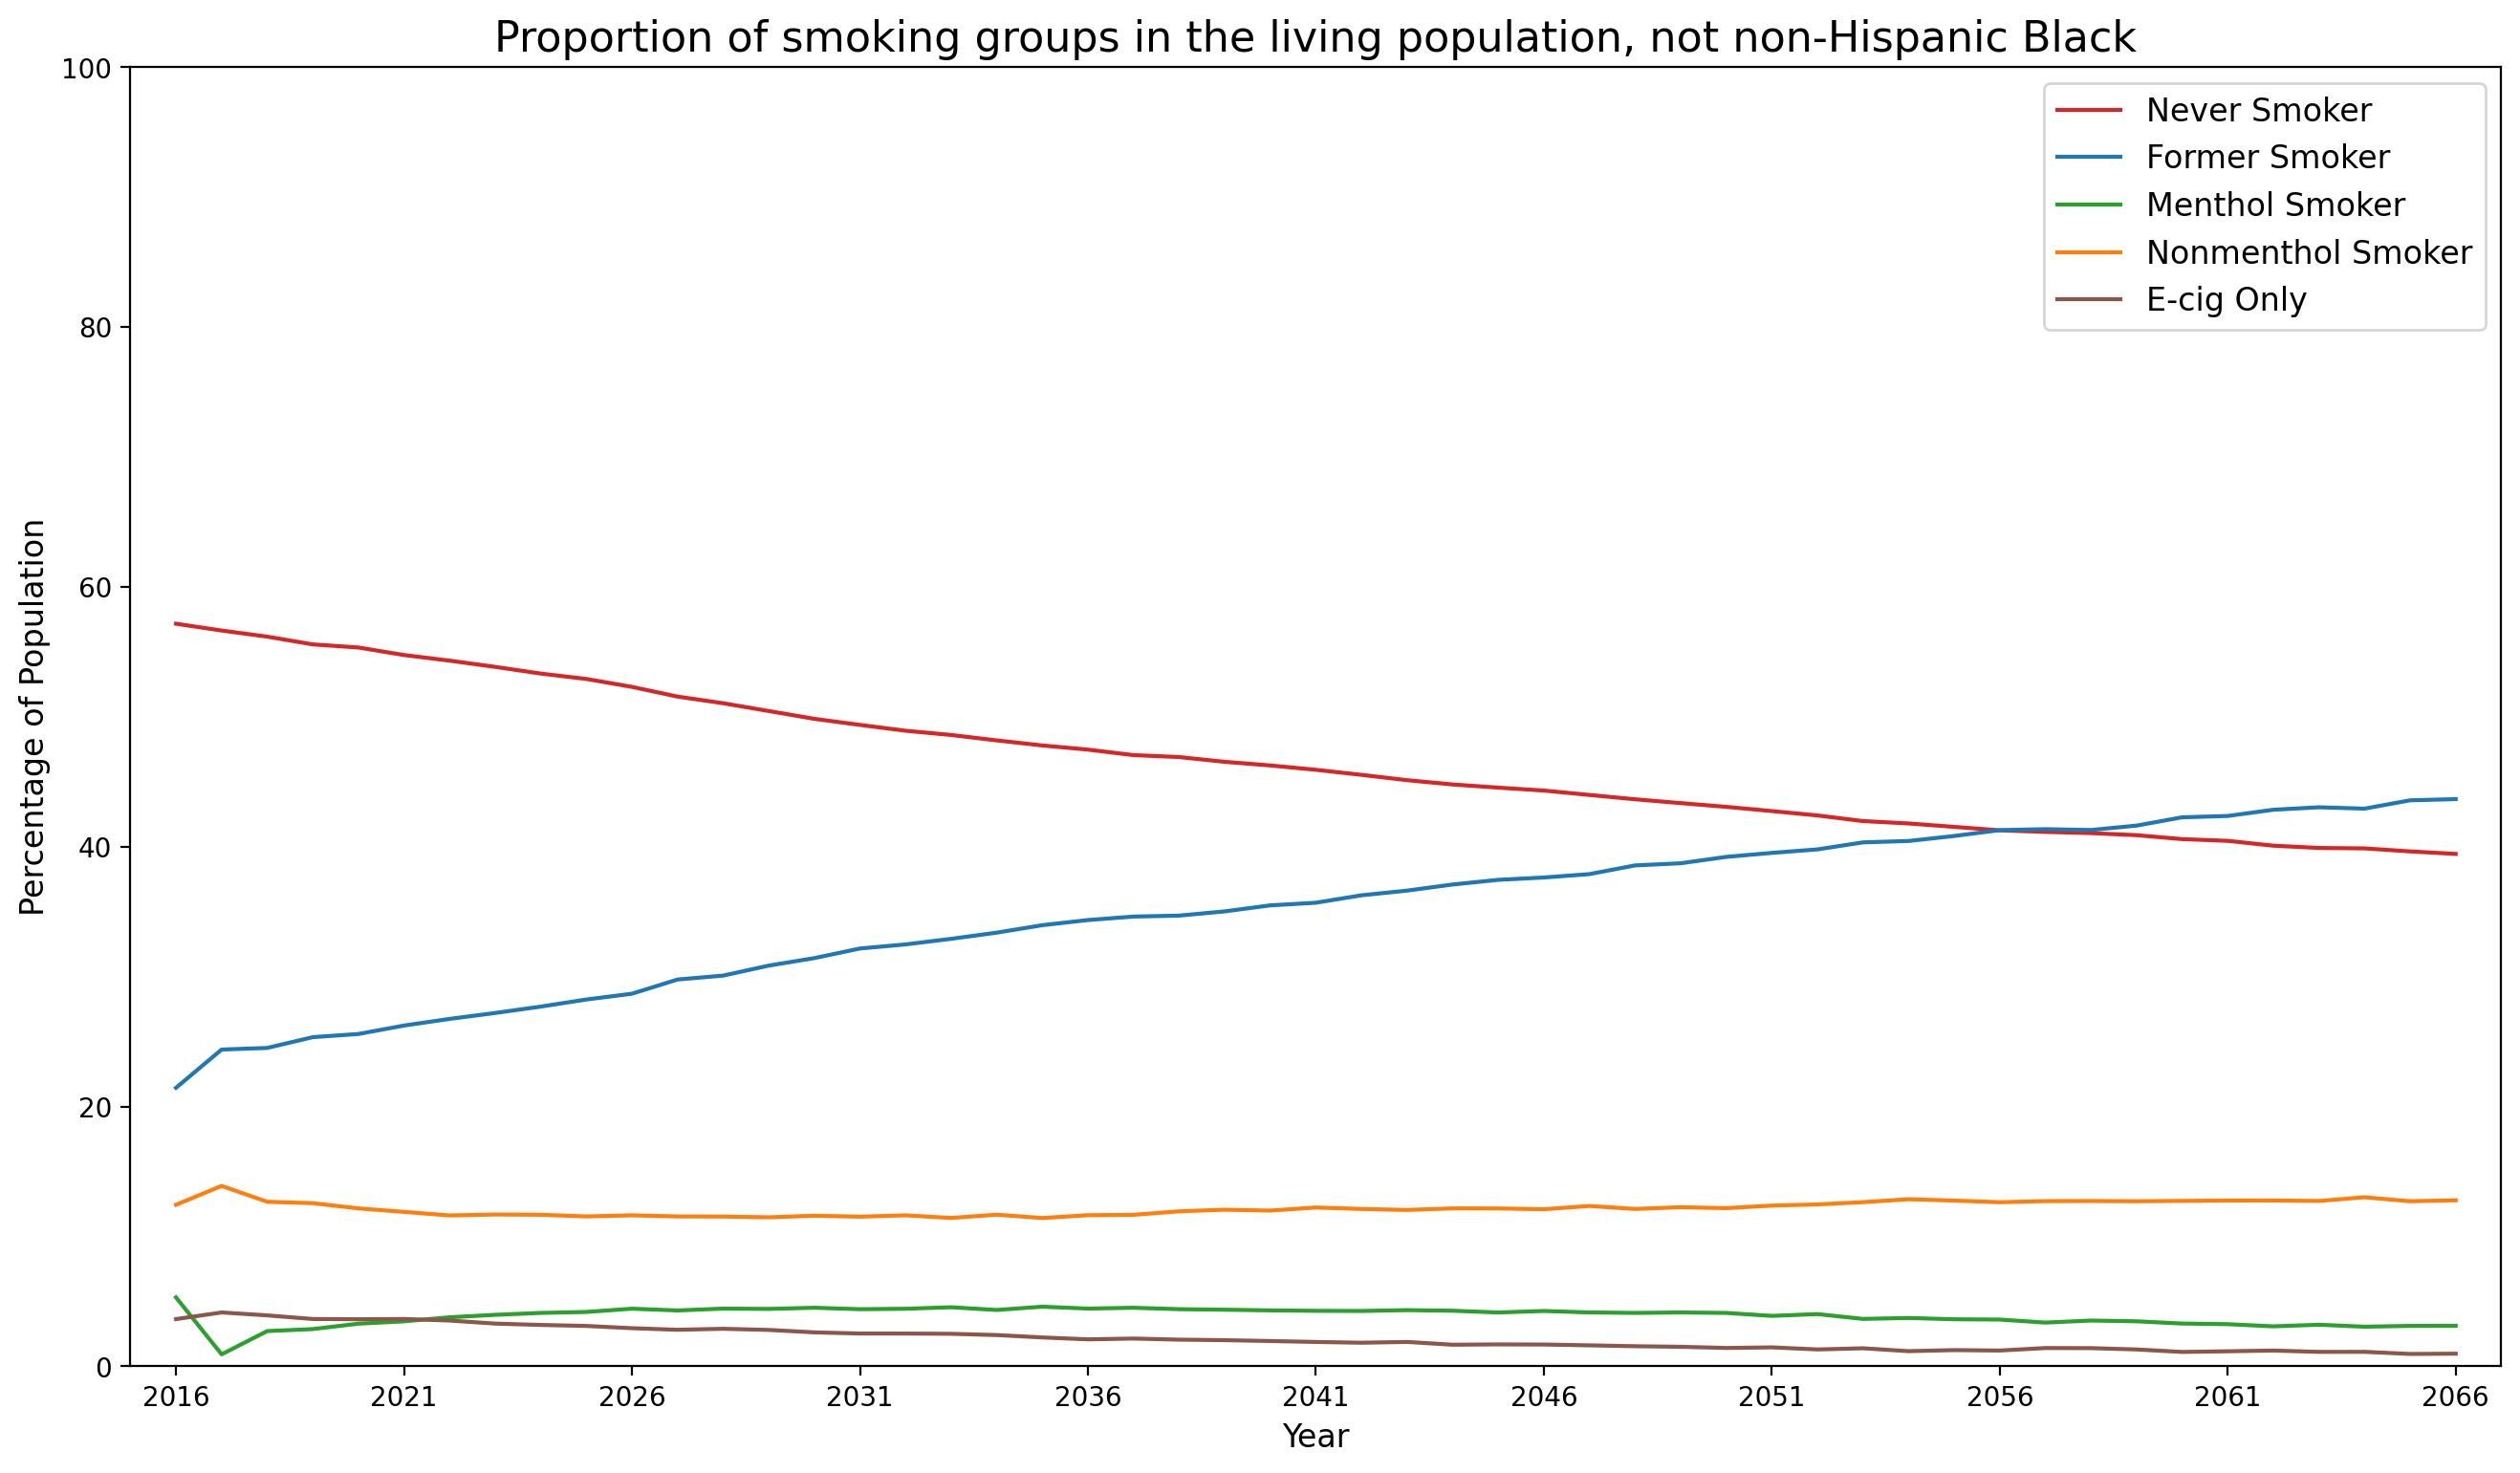

In [333]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

title = 'Proportion of smoking groups in the living population'
if not use_all_race:
    if use_black:
        title += ', non-Hispanic Black'
    else:
        title += ', not non-Hispanic Black'
if not use_all_pov:
    if use_pov:
        title += ', below poverty line'
    else:
        title += ', at or above poverty line'
plt.title(title, fontsize=16)

# for i in range(len(mycolors)-1):
#         ax.get_lines()[i].set_color(mycolors[i])

# len(ax.get_lines())
# len(mycolors)

plt.savefig(savedir + "proportions_groups.png")

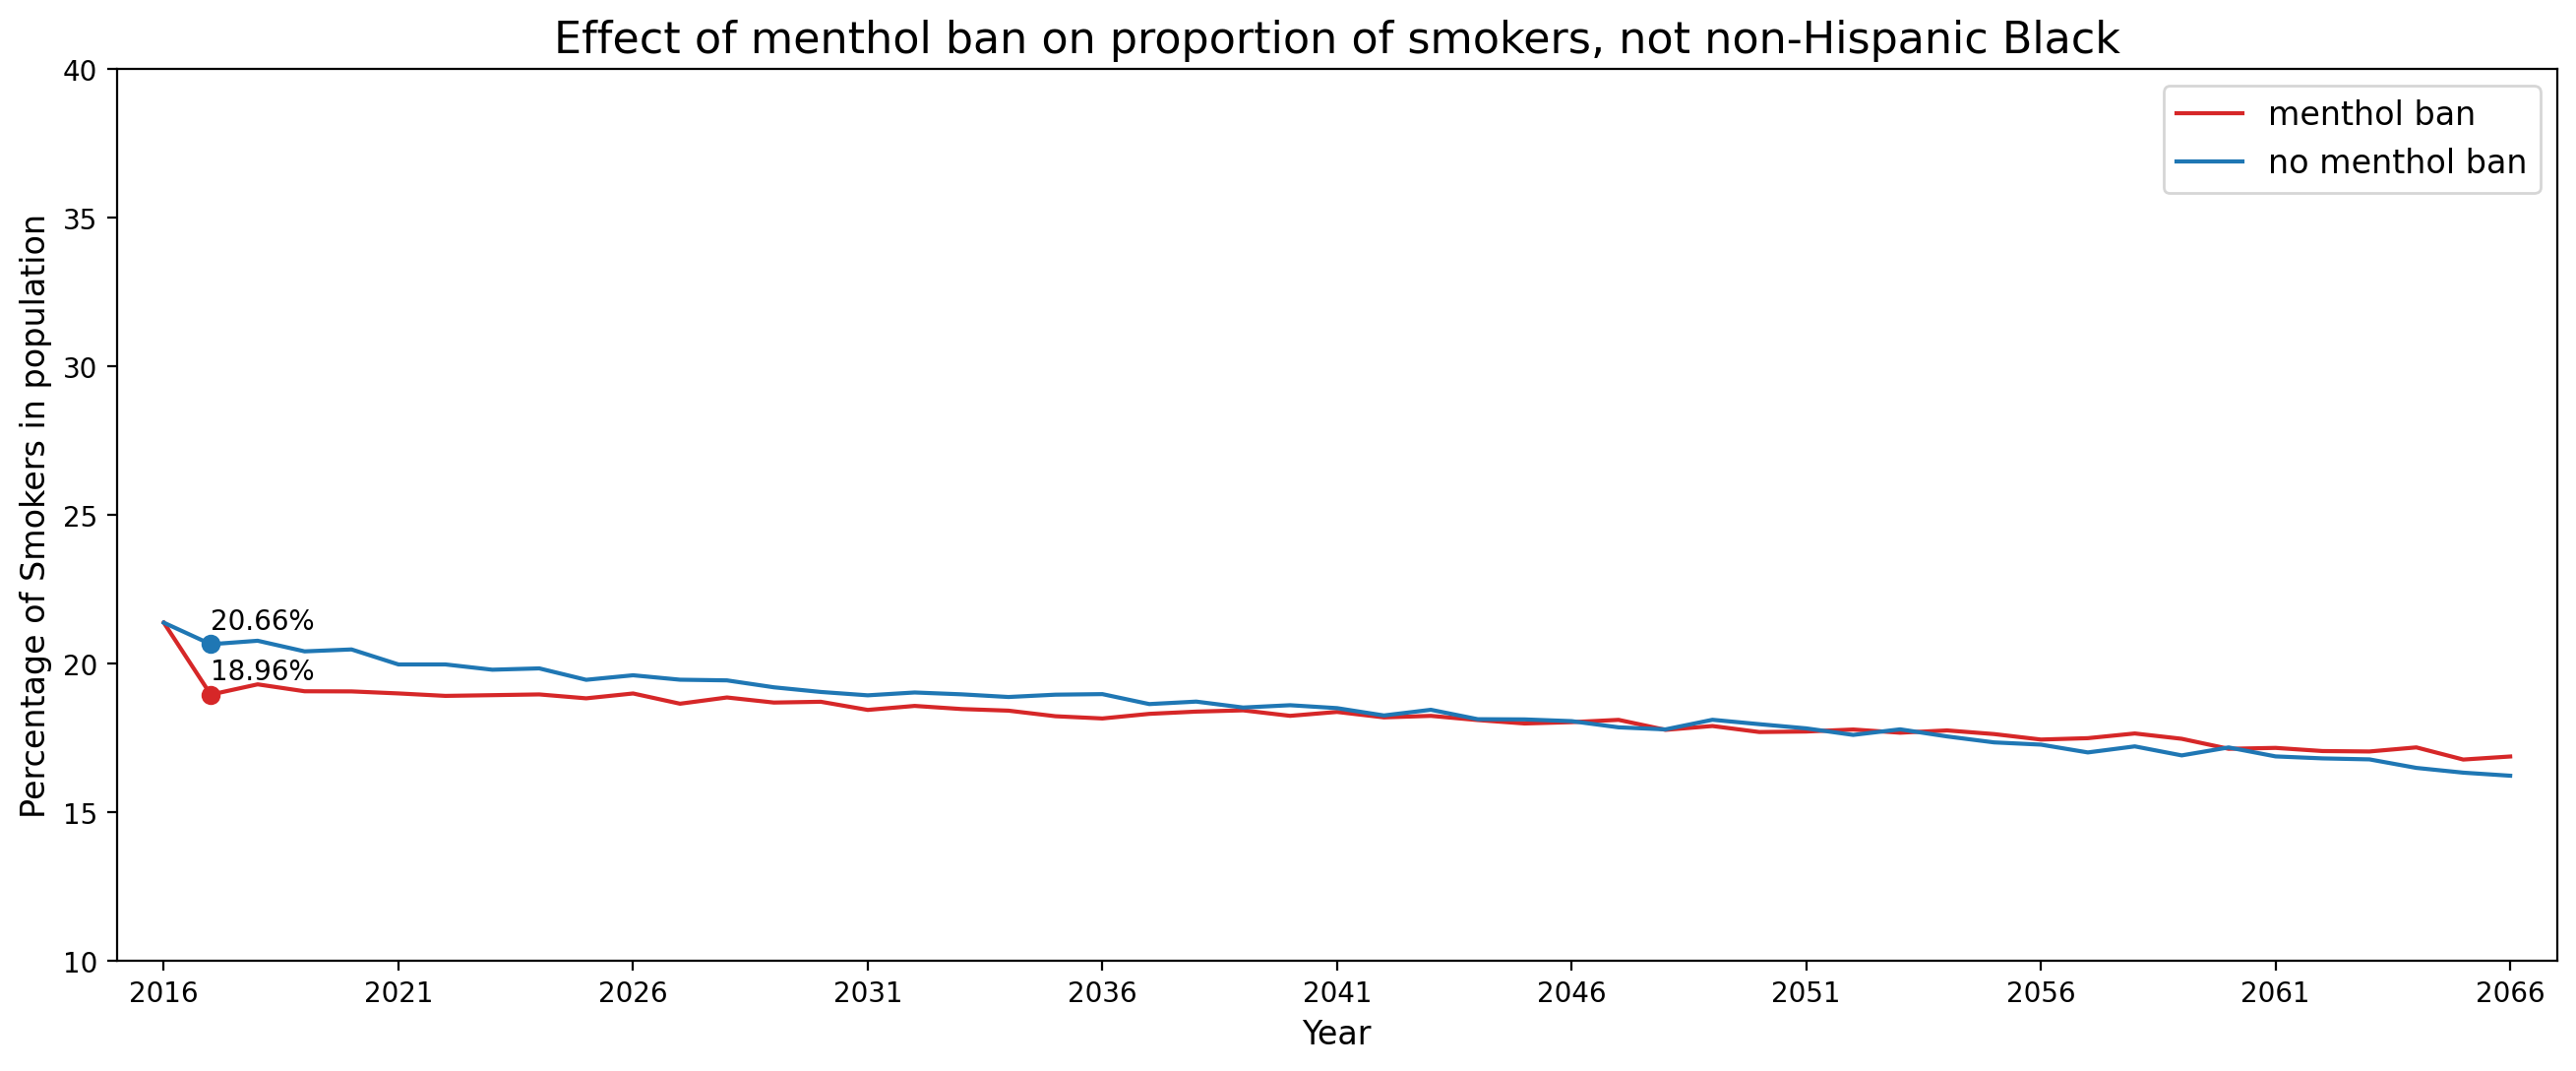

In [334]:
fig, ax = plt.subplots(1,1,figsize=(16,6), dpi=200)
y = np.sum(arr_no_dead_percents[:,2:], axis=1)
y2 = np.sum(arr2_no_dead_percents[:,2:], axis=1)

ax.plot(x, y, mycolors[0])
ax.plot(x, y2, mycolors[1])

plt.ylim(10,40)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Smokers in population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# ax.legend(["complex death rate", "average death rate"], fontsize=12, ncol=1)
ax.legend(["menthol ban", "no menthol ban"], fontsize=12, ncol=1)
for i,j in zip(x, y):
    # if (i - 2016) % 5 == 0 and i > 2040:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i,j+0.5))
        ax.scatter([i],[j],c=mycolors[0])
for i,j in zip(x, y2):
    # if (i - 2016) % 5 == 0 and i > 2040:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i,j+0.5))
        ax.scatter([i],[j],c=mycolors[1])

title = 'Effect of menthol ban on proportion of smokers'
if not use_all_race:
    if use_black:
        title += ', non-Hispanic Black'
    else:
        title += ', not non-Hispanic Black'
if not use_all_pov:
    if use_pov:
        title += ', below poverty line'
    else:
        title += ', at or above poverty line'
# plt.title("Proportion of smokers in the living population", fontsize=16)
plt.title(title, fontsize=16)

plt.savefig(savedir + "proportion_smoker.png")


In [335]:
print(arr_no_dead_percents[:,3][:10])
print(np.sum(arr_no_dead_percents[:,2:], axis=1)[:10])

[12.44024421 13.89197437 12.67137317 12.56215576 12.16117003 11.89380135
 11.61693583 11.68848856 11.66945376 11.54169719]
[21.38657371 18.96738064 19.31276415 19.07949956 19.07500547 19.00719601
 18.92438312 18.94860913 18.9735524  18.84200338]


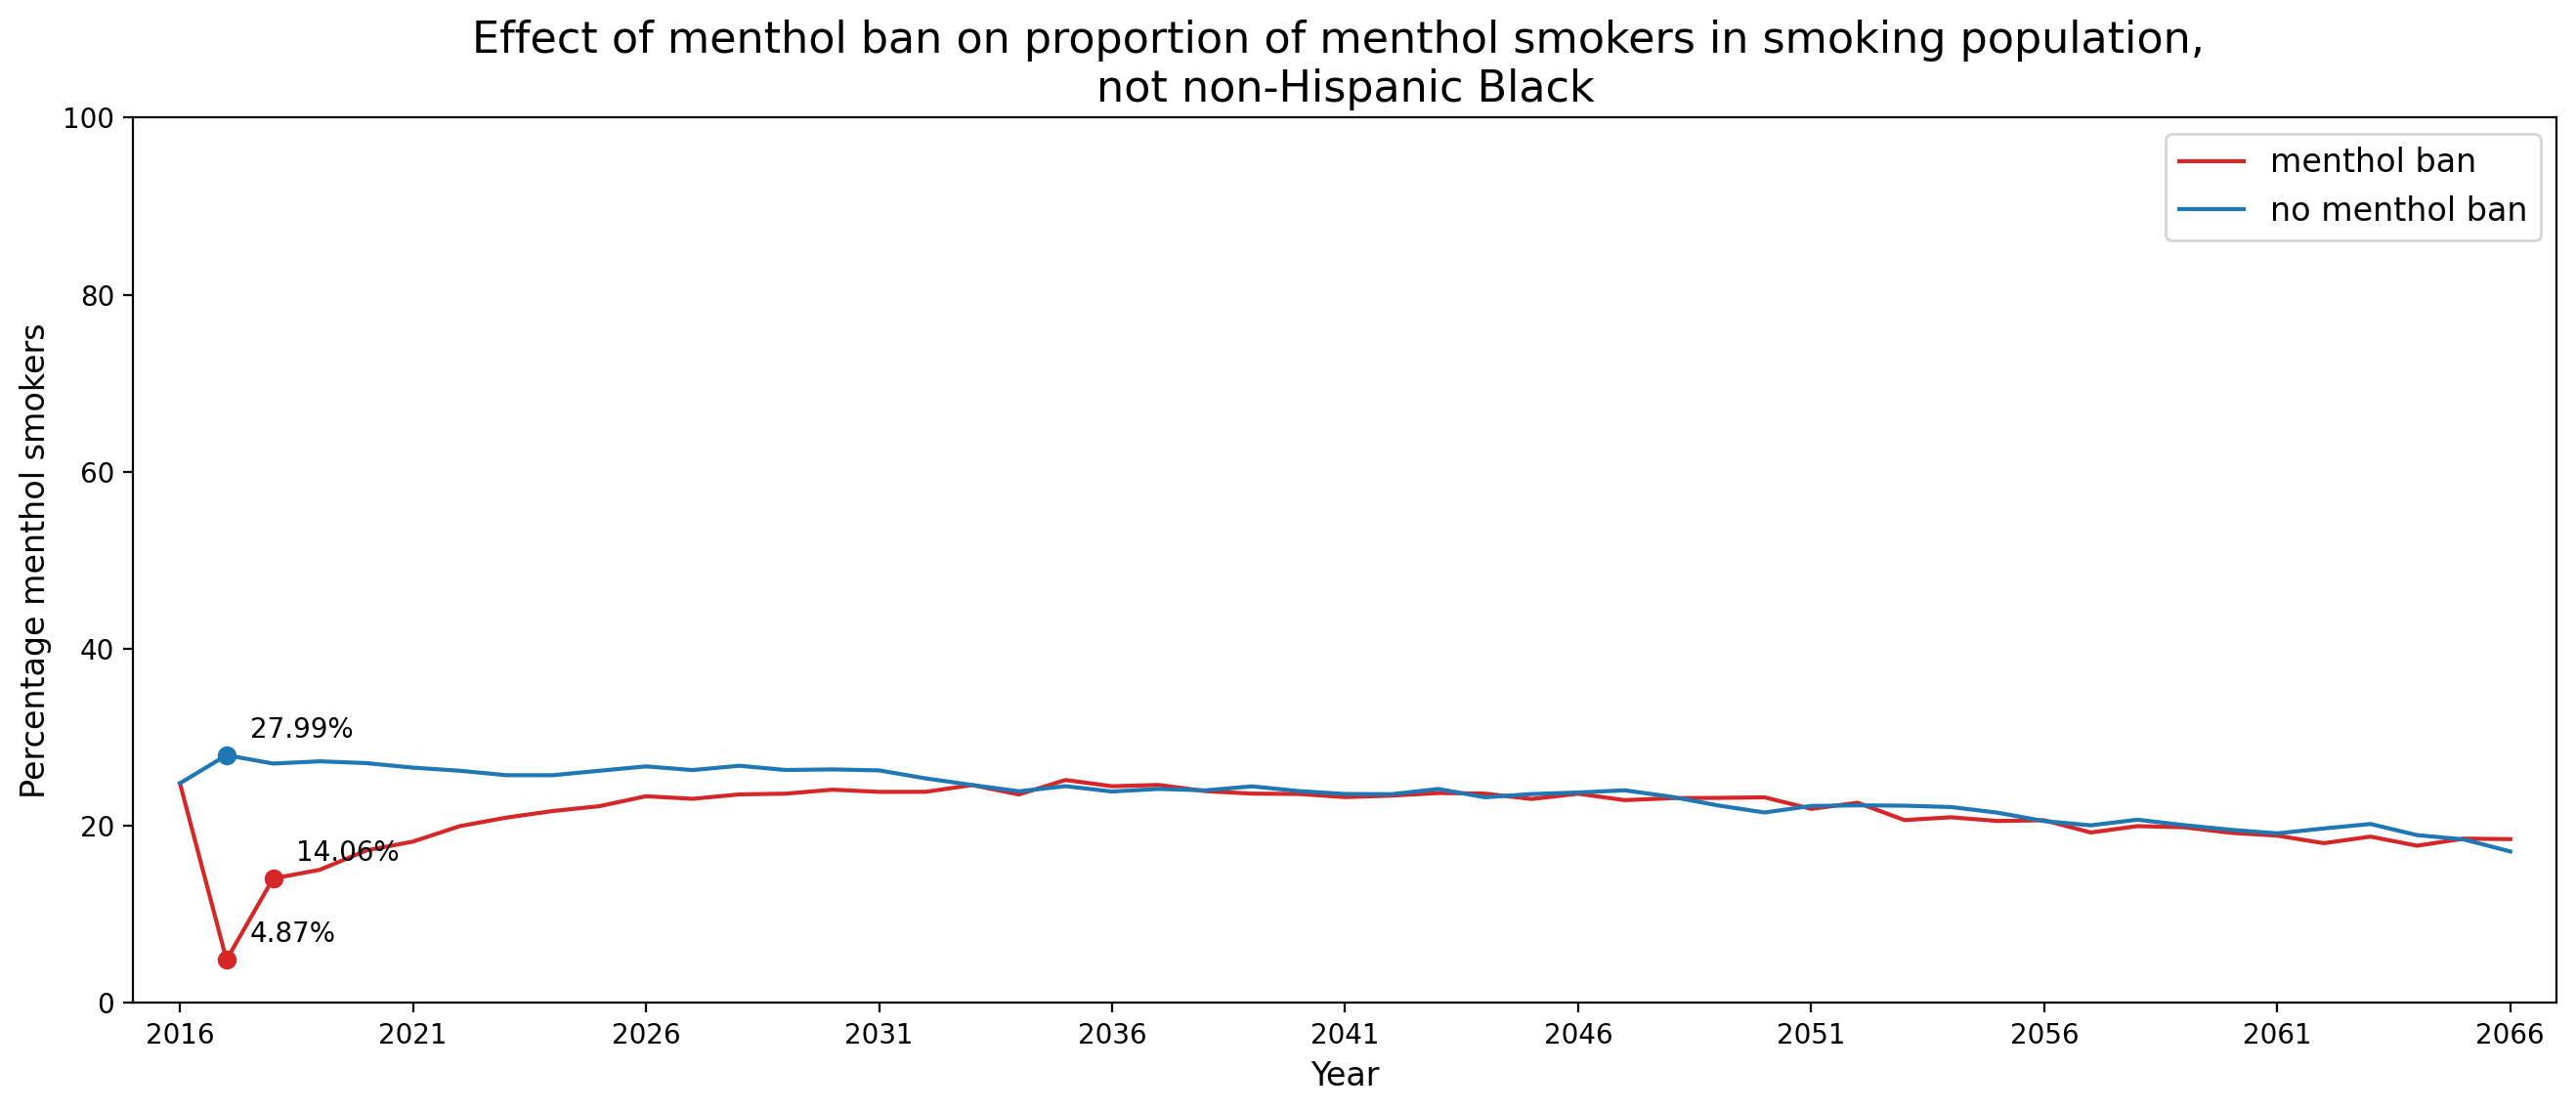

In [336]:
fig, ax = plt.subplots(1,1,figsize=(16,6), dpi=200)
y = arr_no_dead_percents[:,2] / np.sum(arr_no_dead_percents[:,2:], axis=1) * 100
y2 = arr2_no_dead_percents[:,2] / np.sum(arr2_no_dead_percents[:,2:], axis=1) * 100

ax.plot(x, y, mycolors[0])
ax.plot(x, y2, mycolors[1])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage menthol smokers", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# ax.legend(["complex death rate", "average death rate"], fontsize=12, ncol=1)
ax.legend(["menthol ban", "no menthol ban"], fontsize=12, ncol=1)
for i,j in zip(x, y):
    # if (i - 2016) % 5 == 0:
    if i == 2017 or i == 2018:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i + 0.5,j + 2))
        ax.scatter([i],[j],c=mycolors[0])
for i,j in zip(x, y2):
    # if (i - 2016) % 5 == 0:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i + 0.5,j + 2))
        ax.scatter([i],[j],c=mycolors[1])

title = 'Effect of menthol ban on proportion of menthol smokers in smoking population, \n'
if not use_all_race:
    if use_black:
        title += 'non-Hispanic Black'
    else:
        title += 'not non-Hispanic Black'
if not use_all_pov:
    if use_pov:
        title += 'below poverty line'
    else:
        title += 'at or above poverty line'
plt.title(title, fontsize=16)

plt.savefig(savedir + "proportion_menthol.png")